Привет! Меня зовут Исмаилов Исмаил, я буду проверять твой проект :) Можешь обращаться ко мне на «ты». Если тебе комфортно, то и я буду к тебе так обращаться, если нет, то обязательно скажи об этом.

Пожалуйста, не удаляй мои комментарии, которые я буду оставлять в работе. Это особенно поможет, если твои проекты будут отправлены на повторную проверку. При повторных проверках у комментариев будут приписки: "Вторая итерация", "Третья итерация" и т.д. 

Ты тоже можешь реагировать на мои комментарии, но в таком случае постарайся, чтобы твои комментарии отличались от моих: например, выделяй их своим любимым цветом — так у нас не возникнет путаницы :)

Кстати, про цвета! Мои комментарии будут в следующей цветовой гамме: зелеными, желтыми и красными. Например:

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
В случае, если решение на отдельном шаге является полностью правильным. </div>

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
В случае, если решение может стать еще лучше с некоторыми корректировками </div>
 
<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
В случае, если решение какого-то шага требует значительных изменений. Проект не может быть принят с первого раза, если ревью содержит комментарии, помеченные этим цветом </div>

# Рекомендация тарифов

**Исходные данные:** 

данные о поведении клиентов, которые уже перешли на эти тарифы 

**Цель:**

построить модель для задачи классификации, которая выберет подходящий тариф со значением accuracy более 0.75

**Этапы исследования:**


1.   Загрузка исходных данных и их общая оценка, построение гистрограмм для каждого столбца с числовыми значениями

2. Разделить исходные данные на обучающую, валидационную и тестовую выборки

3. Исследовать качество разных моделей, меняя гиперпараметры 

4. Проверить качество модели на тестовой выборке

5. Проверить модели на вменяемость

5. Заключение


## 1 Загрузка исходных данных

In [1]:
! pip install fast_ml --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.dummy import DummyClassifier

In [3]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  df = pd.read_csv("/content/drive/MyDrive/Yandex/users_behavior.csv")
except:
  df = pd.read_csv("/datasets/users_behavior.csv")

<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b> 
    
Хвалю за использование конструкции try-except

In [4]:
df.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
def df_info(df):
  print("Общая информация по датасету")
  display(df.info())
  df.columns = df.columns.str.lower()
  print()

  print("Гистограммы по числовым столбцам")
  df.hist(figsize=(10, 8), layout=(2, 3))
  plt.show()
  print()

  print("Статистическая информация по числовым и нечисловым столбцам")
  display(df.describe(include="number"))
  print()
  #display(df.describe(exclude="number"))
  #print()

  print("Количество пропущенных значений")
  display(df.isna().sum())
  print()
  display(pd.DataFrame(round(df.isna().mean()*100,))\
  .style.background_gradient('coolwarm'))
  print()

  print('\033[1m' + "Количество явных дубликатов")
  display(df.duplicated().sum())
  print()
  print("Корреляция данных")
  plt.figure(figsize=(18,16))
  sns.heatmap(df.corr(),annot=True, linewidths=0.3, 
              cmap='coolwarm', square=True)
  plt.show()

Общая информация по датасету
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None


Гистограммы по числовым столбцам


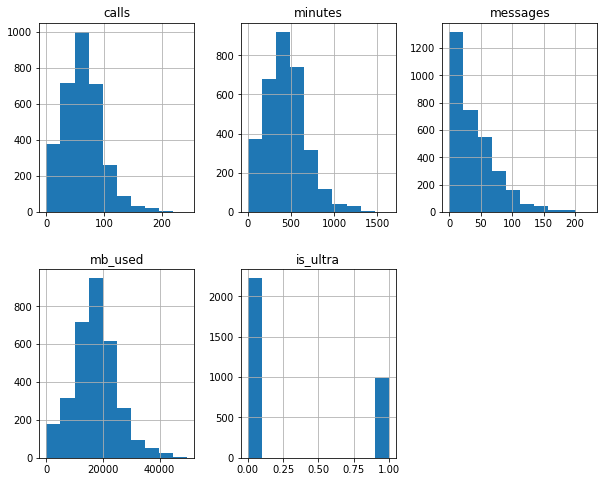


Статистическая информация по числовым и нечисловым столбцам


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000



Количество пропущенных значений


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

,0
calls,0.000000
minutes,0.000000
messages,0.000000
mb_used,0.000000
is_ultra,0.000000



Количество явных дубликатов


0


Корреляция данных


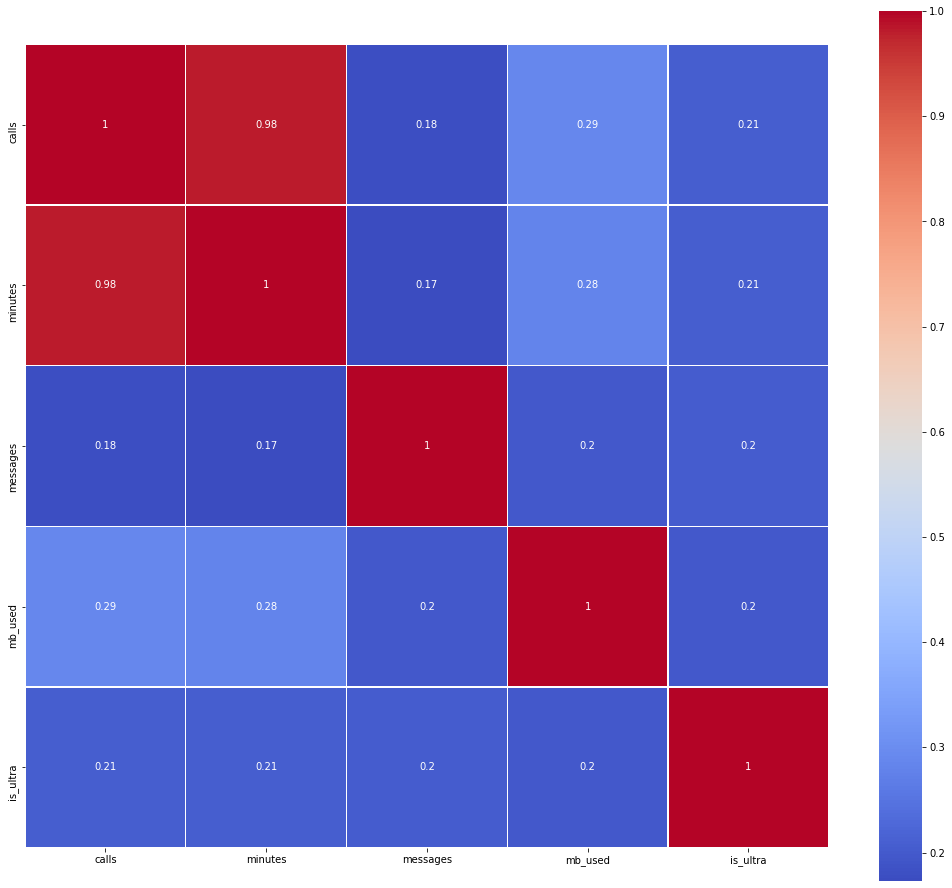

In [6]:
df_info(df)

Пропущенных значений нет, распределение значений в столбцах близко к гауссовому (нормальному). Между столбцами наблюдается наличие корреляции (от очень слабой до высокой), что говорит о предсказуемой взаимосвязи. 

<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b> 
    
Хороший первичный обзор данных

## 2 Разбиение на выборки

Для данного датасета нет отдельного датасета для проверки, поэтому разделим датасет на три части в соотношении 3:1:1 как:
* 60% составят данные для обучения модели;
* 20% составят для предсказания результатов;
* 20% составят поверочные данные, для контроля качества.

In [7]:
# divide data on 2 parts and 4 variables
X_train, y_train, X_valid, y_valid, X_test, y_test = (
    train_valid_test_split(df, target="is_ultra", train_size=0.6, valid_size=0.2, 
                     test_size=0.2, random_state=42))

In [8]:
# look at the size dividing parts
print(
    X_train.shape, 
    X_valid.shape,
    X_test.shape,
    y_train.shape,
    y_valid.shape,
    y_test.shape, sep=" ")

(1928, 4) (643, 4) (643, 4) (1928,) (643,) (643,)


<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Выборки разделены верно, хвалю за то, что проверены их размеры с помощью shape

### Вывод

При разделении датасета использовалось 6 переменных: 2 переменных для обучающего датасета, 2 для валидации(предсказания), 2 для последующей проверки качества модели.

## 3 Исследование модели

Теперь необходимо выбрать более подходящий алгоритм для обучения модели. Длч этого протестируем все доступные тип моделей для бинарного целевого признака: DecisionTreeClassifire, RandomForestClassifire, LogisticRegresion

In [9]:
# create fist model use LogisticRegression
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_log.fit(X_train, y_train)
pred_log = model_log.predict(X_valid)
accuracy_log = accuracy_score(pred_log, y_valid)
print(f"Наилучшее качество модели:{accuracy_log: .3}")

Наилучшее качество модели: 0.74


Качество модели при использовании логистической регрессии невелико - 0.74, следовательно небходимы другие методы 

In [10]:
# create the model DesicionTreeClassifirer and check its quality
best_model = None
best_accuracy = accuracy_log
graf = pd.DataFrame()
for i in range(1, 31):
  model_tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  model_tree.fit(X_train, y_train)
  pred_tree = model_tree.predict(X_valid)
  accuracy_tree = accuracy_score(pred_tree, y_valid)
  graf.loc[i, "tree"] = accuracy_tree
  if accuracy_tree > best_accuracy:
     best_model = model_tree
     best_accuracy = accuracy_tree


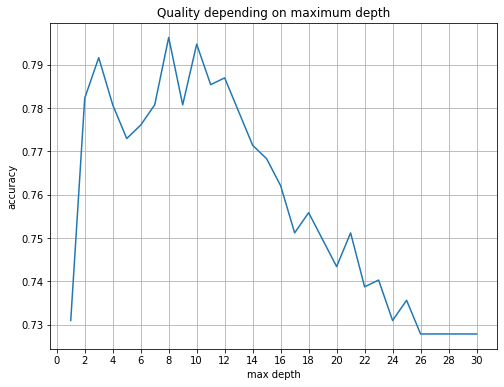

In [11]:
# show quality graph 
plt.figure(figsize=(8, 6))
plt.plot(graf)
plt.title("Quality depending on maximum depth")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.grid(True)
plt.xticks(range(0, 31, 2))
plt.show()

In [12]:
# show the best accuracy
print(f"Наилучшее качество модели:{best_accuracy: .2}")

Наилучшее качество модели: 0.8


<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 Ко всему пукнту </b> 
    
Для более красивого оформления можно здесь использовать f-strings. Подробнее про них почитать можешь здесь или на любом другом сайте: https://python-scripts.com/f-strings

Модель с использованием дерева решений показала качество выше, по сравнению с моделью с использованием логистической регрессии. Качество модели, при глубине дерева более 10, снижается. Для значения гиперпараметра глубины более 26 наблюдается стагнация значения качества. Дальнейшее увеличение параметра глубины не имеет значения. Максимальное значение качества для этой модели - 0.796 с максимальной глубиной 8. Возможно, модель случайного леса с подбором гиперпараметров, покажет результат выше

In [13]:
# check the RandomForestClassifier model quality  
graf_1 = pd.DataFrame()
for i in range(1, 31):
  for j in range(1, 31):
    model = RandomForestClassifier(n_estimators=j, max_depth=i, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    accuracy = accuracy_score(pred, y_valid)
    graf_1.loc[i, j] = accuracy
    if accuracy > best_accuracy:
      best_model = model
      best_accuracy = accuracy

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b>

В этих гиперпараметрах у тебя маленький диапазон значений, хотелось бы побольше увидеть

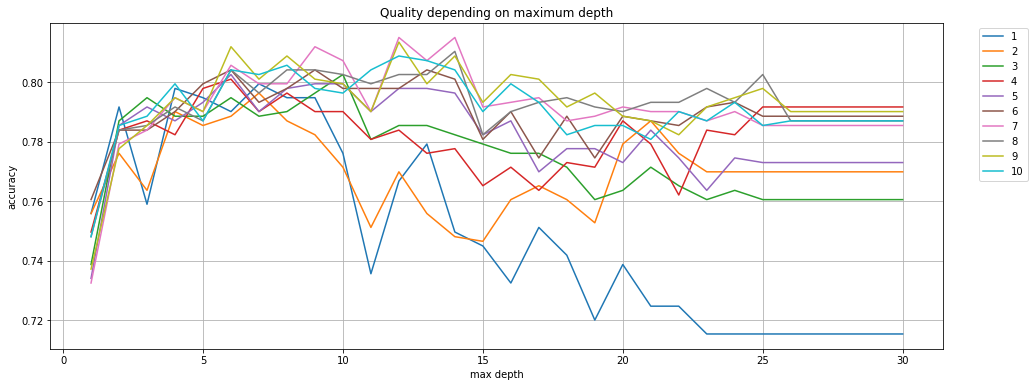

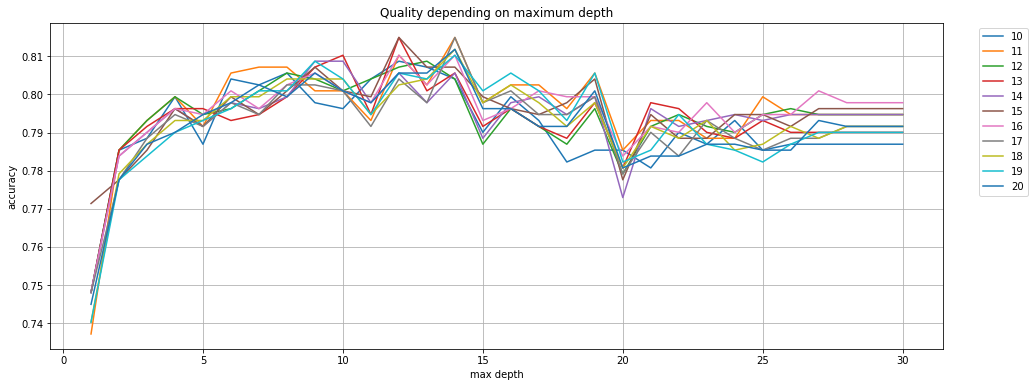

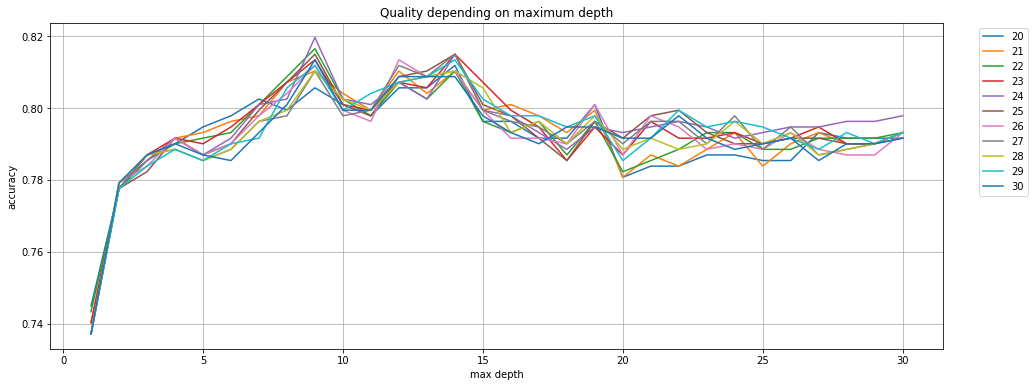

In [14]:
# show 3 graphs for diffrent amount of trees
for i in [10, 20, 30]:
  plt.figure(figsize=(16, 6))
  plt.plot(graf_1.loc[:, i-10:i])
  plt.title("Quality depending on maximum depth")
  plt.xlabel("max depth")
  plt.ylabel("accuracy")
  plt.legend(graf_1.loc[:, i-10:i].columns, 
             bbox_to_anchor=(.6, 0.5, 0.5, 0.5))
  plt.grid(True)
  plt.show()

In [15]:
# show the accuracy
print(f"Наилучшее качество модели:{best_accuracy: .3}")

Наилучшее качество модели: 0.82


При максимальной глубине менее 15 показатели качества наиболее высокие. Количество деревьев сказывается на начале плато для показателя качества: в диапазоне от 0 до 10 деревьев плато начинается от значения 26 показателя максимальной глубины; от 10 до 20 начало плато отодвигается до 26. Наилучшие показатели качества показывает модель с количеством деревьев от 20 до 30 и максимальной глубиной в пределах 10, что показывает пик обучаемости именно в этих пределах.

### Вывод

Наиболее высокий показатели качества обученной модели показал метод случайный лес. При соответствующем подборе параметров качество модели, оцениваемое как доля правильных предсказаний модели, приблизилось к 0.8

## 4 Проверка модели на тестовой выборке

Обученная модель готова проходит проверку на тестовой выборке

In [16]:
# check model abilities 
pred_test = best_model.predict(X_test)
print(f'Качество модели на тестовой выборке = \
{accuracy_score(pred_test, y_test): 2.0%}')

Качество модели на тестовой выборке =  82%


<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Модель проверена на тесте

### Вывод
Изменив параметры модели удалось добиться качества моделии с accuracy более 0.75 

## 5 Проверка модели на адекватность

Для проведения sanity check (проверки на адекватность), используем базовую модель из библиотеки sklearn, которая предсказывает наиболее часто встречающийся класс.

In [17]:
sanity_check = DummyClassifier(strategy="most_frequent")
sanity_check.fit(X_train, y_train)
print(f'Качество базовой модели и обученной модели:\
{accuracy_score(sanity_check.predict(X_test), y_test): .2} \
и{accuracy_score(pred_test, y_test): .2} \
соответственно')

Качество базовой модели и обученной модели: 0.7 и 0.82 соответственно


<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Можно проще, посмотреть на баланс классов: например, если у нас 90 процентов таргета это "1", а остальные "10" - 0, то мы можем тупо выдавать каждый раз цифру 1 и получать метрику 90 %. Любая модель, которая будет выдавать качество ниже этого - плохая/неадекватная

### Вывод
Сравнение качества обученной модели и базовой позволяет говорить о том, что обученная модель обрабатывает входящие значения корректно 

## 6 Заключение

Полученный данные уже прошли этап предобработки, поэтому отдельных шагов на этом этапе не было предпринято. Далее данные были разделены на три выборки: тренировочную, валидационную и тестовую. Исследование подходящей модели проводилось на тренировочной и валидационных выборках. Для окончательной работы была выбрана модель случайного леса с accuracy 0.8 для валидационной выборки. На тестовой(окончательной) выборке модель показала качество выше ожидаемого - 0.81, что говорит о 19% вероятности ошибки при использовании данной модели. Сравнительная оценка с базовой моделью так же показала хорошие результаты. Модель можно использовать для предложения тарифа пользователям

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b>

Хороший проект, тобою проделана большая работа, ты молодец!

Сперва похвалю за наличие везде промежуточных выводов, комментариев. Хороший код, показываешь навыки владения sklearn. Все требуемые пункты в задании в целом выполнены. Оставил пару желтых комментариев, думаю, это сможет улучшить твой проект. Также можно добавить визуализацию в проект: посмотреть на графиках, как влияет перебор параметров на результат нашей метрики

В этом проекте большое внимание уделяется подбору гиперпараметров, но это можно автоматизировать! Советую почитать на досуге про GridsearchCV и Optuna, будет полезно
    
Если хочешь, отправляй проект и так, без доработок. Готов принять, потому что не было критических ошибок.

Удачи!